In [2]:
#importing all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris=pd.read_csv('IRIS.csv')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.shape

(150, 5)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
iris.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
display(pd.DataFrame(iris.species.value_counts()))

,species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


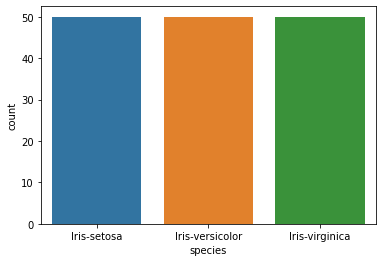

In [16]:
sns.countplot(x='species', data=iris, )
plt.show()

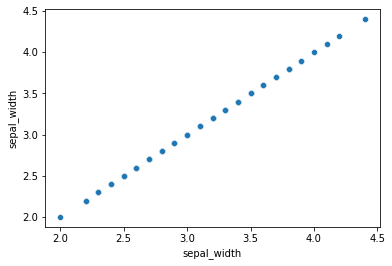

In [19]:
sns.scatterplot(iris['sepal_width'], iris['sepal_width'])
plt.show()

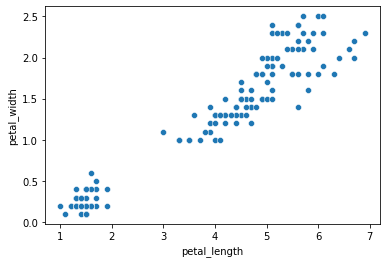

In [20]:
sns.scatterplot(iris['petal_length'], iris['petal_width'])
plt.show()


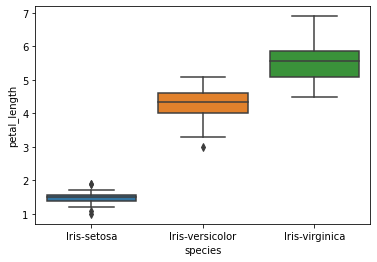

In [21]:
sns.boxplot(x="species", y="petal_length", data=iris )
plt.show()

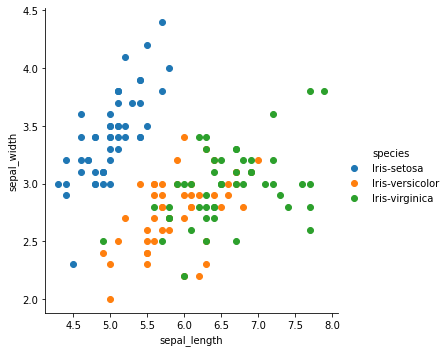

In [23]:
sns.FacetGrid(iris, hue="species", size=5) \
 .map(plt.scatter, "sepal_length", "sepal_width") \
 .add_legend()
plt.show()

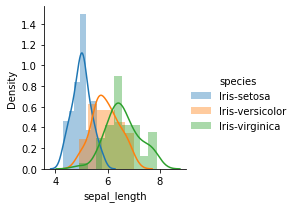

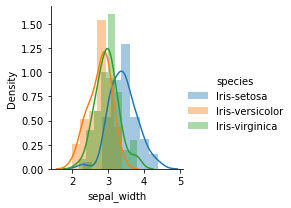

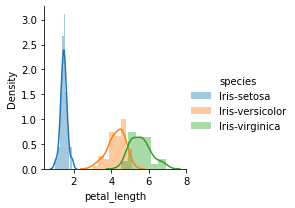

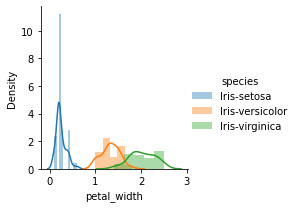

In [26]:
plot = sns.FacetGrid(iris,hue="species")
plot.map(sns.distplot,"sepal_length").add_legend()
plot = sns.FacetGrid(iris,hue="species")
plot.map(sns.distplot,"sepal_width").add_legend()
plot = sns.FacetGrid(iris,hue="species")
plot.map(sns.distplot,"petal_length").add_legend()
plot = sns.FacetGrid(iris,hue="species")
plot.map(sns.distplot,"petal_width").add_legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris.species = le.fit_transform(iris.species)

In [32]:

X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [34]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model=LinearRegression()


In [38]:
a=model.fit(X_train,y_train)

In [39]:
a

LinearRegression()

In [40]:
print(a.score(X_test,y_test))


0.9442423557735325


In [41]:
pred=a.predict(X_test)
pred


array([ 1.87247332,  1.98003412, -0.03208777,  1.00322223,  1.08522592,
        1.79266113, -0.02241316,  2.13410227,  1.04258408,  2.11667991,
        1.17822748,  1.70074807,  1.09677437,  1.72496518,  0.03507435,
       -0.13742264,  0.04325668,  1.42203393, -0.091363  ,  1.12465666,
       -0.05302488,  1.68364612,  1.66296052,  1.26292842,  1.31708426,
        1.80069482, -0.02879055,  1.16735017, -0.13909389, -0.18769623,
        0.03355173, -0.05636967, -0.10820033,  1.79082401,  1.16800182,
        2.00336483,  1.48283589, -0.091363  ])

In [42]:
from sklearn import metrics as m

In [43]:
m.mean_absolute_error(y_test,pred)


0.15384297833279661

In [44]:
m.mean_squared_error(y_test,pred)

0.04108457995634442

In [48]:
def classify(num):
    if num<0.5:
        return 'Setosa'
    elif num <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [50]:
import gradio as gr
import numpy as np
def predict_flower(sl,sw,pl,pw):
    input_array=np.array([[sl,sw,pl,pw]])
    pred=a.predict(input_array)
    output=classify(pred[0])
    if output=='Setosa':
        return [(0,output)]
    elif output=='Versicolor':
        return [(1,output)]
    else:
        return [(2,output)]

In [ ]:
sl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Length")
sw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Width")
pl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Length")
pw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Width")
op=gr.outputs.HighlightedText(color_map={ "Setosa": "lightgreen",
 "Versicolor": "pink",
 "Virginica": "yellow",})
gr.Interface(predict_flower, inputs=[sl,sw,pl,pw], outputs=op,live=True).launch(debug=True)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
